In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,f1_score
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [5]:
train = pd.read_csv("loan-train.csv")

In [6]:
test = pd.read_csv("loan-test.csv")

In [7]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [9]:
train.shape

(614, 13)

In [10]:
test.shape

(367, 12)

In [11]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


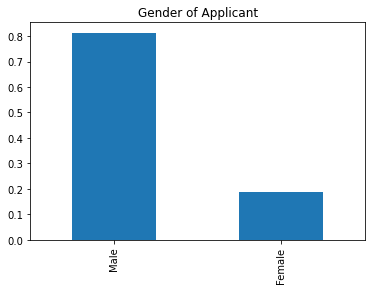

In [13]:
train["Gender"].value_counts(normalize=True).plot.bar(title="Gender of Applicant")
plt.show()

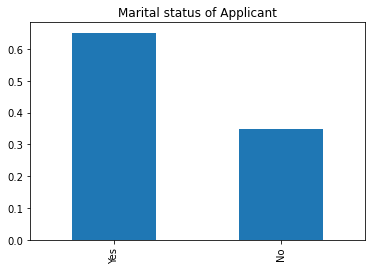

In [14]:
train["Married"].value_counts(normalize=True).plot.bar(title="Marital status of Applicant")

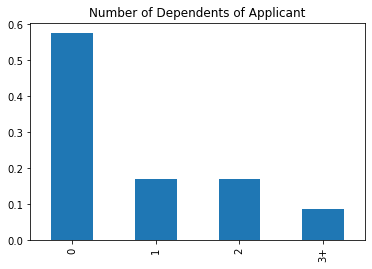

In [15]:
train["Dependents"].value_counts(normalize=True).plot.bar(title="Number of Dependents of Applicant")
plt.show()

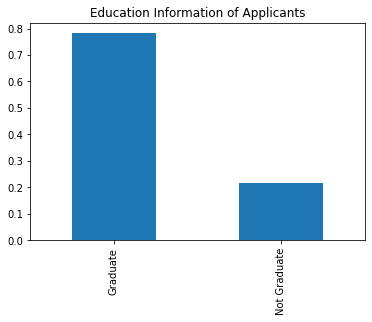

In [16]:
train["Education"].value_counts(normalize=True).plot.bar(title="Education Information of Applicants")
plt.show()

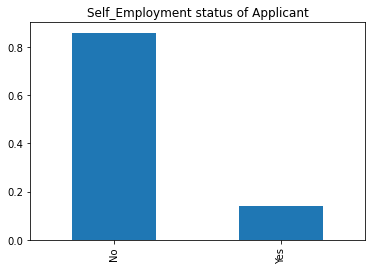

In [17]:
train["Self_Employed"].value_counts(normalize=True).plot.bar(title="Self_Employment status of Applicant" )
plt.show()

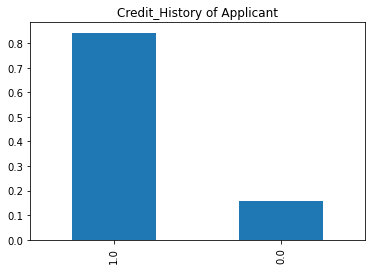

In [18]:
train["Credit_History"].value_counts(normalize=True).plot.bar(title="Credit_History of Applicant")
plt.show()

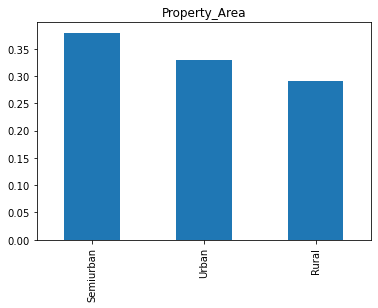

In [19]:
train["Property_Area"].value_counts(normalize=True).plot.bar(title="Property_Area")
plt.show()

In [20]:
train["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

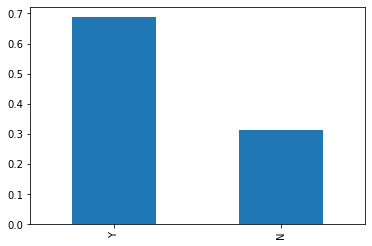

In [21]:
loan_count = train["Loan_Status"].value_counts(normalize=True) 
loan_count.plot.bar()

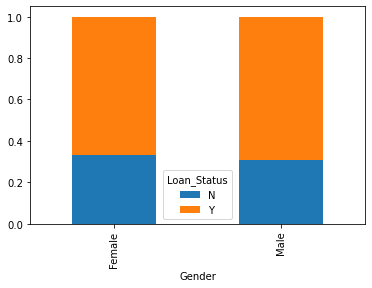

In [22]:
gender_vs_loan_status=pd.crosstab(train["Gender"],train["Loan_Status"])
gender_vs_loan_status.div(gender_vs_loan_status.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.show()

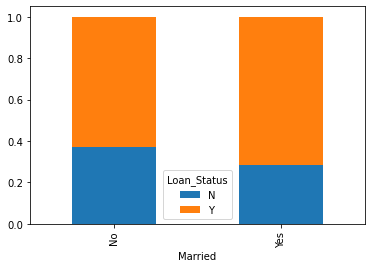

In [23]:
married_vs_loan_status=pd.crosstab(train["Married"],train["Loan_Status"])
married_vs_loan_status.div(married_vs_loan_status.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.show()

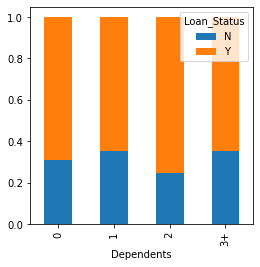

In [24]:
dependents_vs_loan_status=pd.crosstab(train["Dependents"],train["Loan_Status"])
dependents_vs_loan_status.div(dependents_vs_loan_status.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

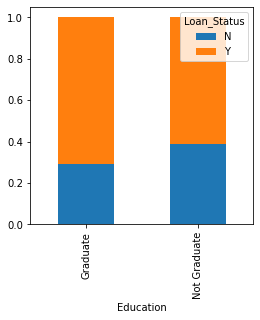

In [25]:
education_vs_loan_status=pd.crosstab(train["Education"],train["Loan_Status"])
education_vs_loan_status.div(education_vs_loan_status.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

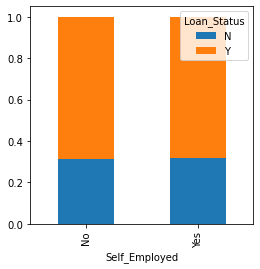

In [26]:
self_employed_vs_loan_status=pd.crosstab(train["Self_Employed"],train["Loan_Status"])
self_employed_vs_loan_status.div(self_employed_vs_loan_status.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

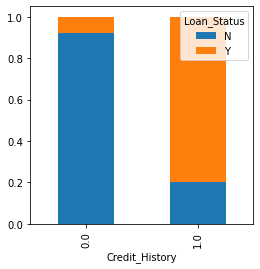

In [27]:
credit_history_vs_loan_status=pd.crosstab(train["Credit_History"],train["Loan_Status"])
credit_history_vs_loan_status.div(credit_history_vs_loan_status.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

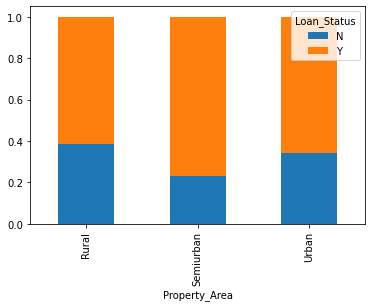

In [28]:
property_area_vs_loan_status=pd.crosstab(train["Property_Area"],train["Loan_Status"])
property_area_vs_loan_status.div(property_area_vs_loan_status.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.show()

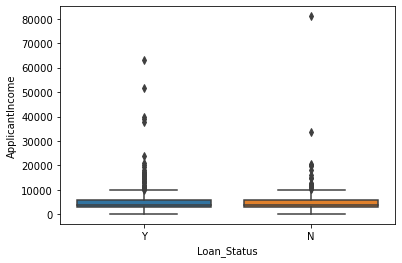

In [29]:
sns.boxplot(x='Loan_Status',y='ApplicantIncome',data=train)

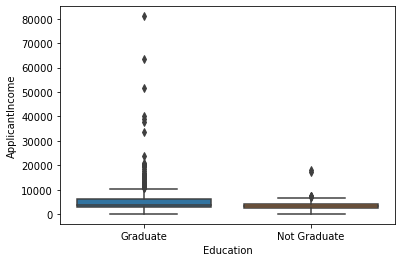

In [30]:
sns.boxplot(x='Education',y= 'ApplicantIncome',data=train) 

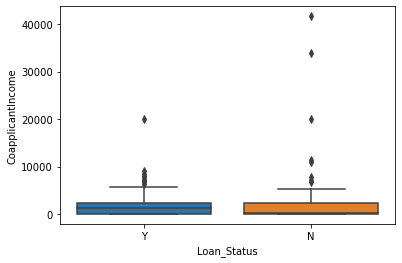

In [31]:
sns.boxplot(x='Loan_Status',y='CoapplicantIncome',data=train)

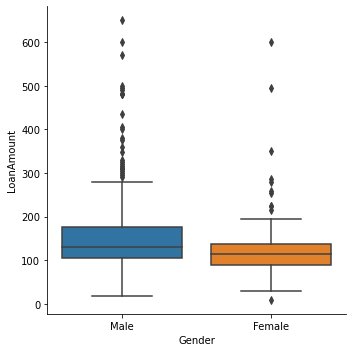

In [32]:
sns.catplot(x='Gender',y='LoanAmount',data=train,kind="box")

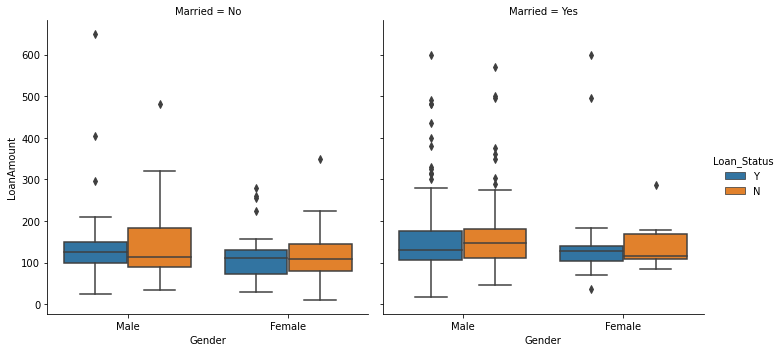

In [33]:
sns.catplot(x='Gender',y='LoanAmount',data=train,kind='box',hue='Loan_Status',col='Married')

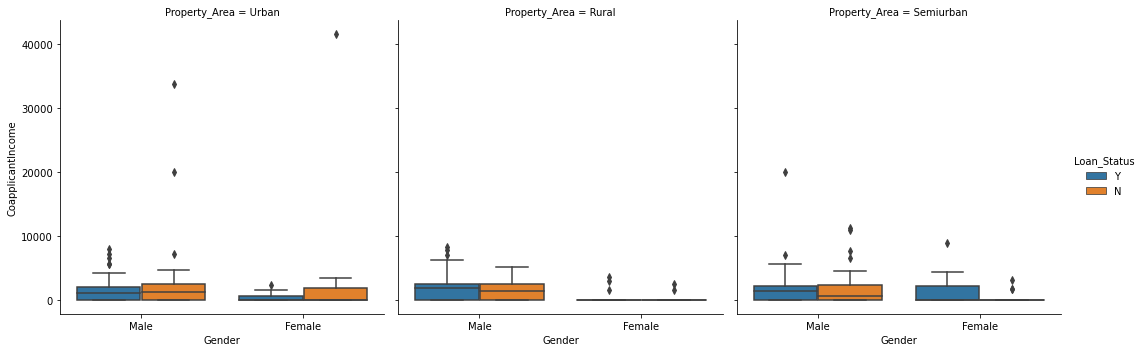

In [34]:
sns.catplot(x='Gender',y='CoapplicantIncome',data=train,kind='box',hue='Loan_Status',col='Property_Area')

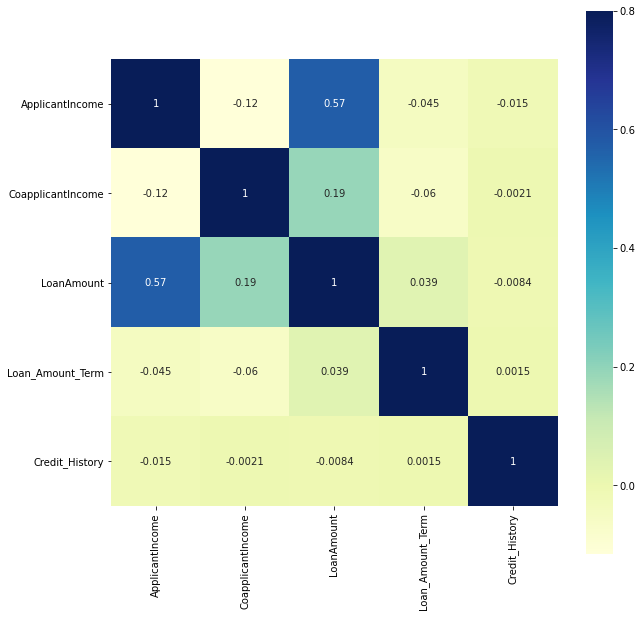

In [35]:
corr_matrix = train.corr()
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix,vmax=0.8,square=True,cmap="YlGnBu", annot = True)

In [36]:
train["Loan_Status"].replace("Y",1,inplace=True)
train["Loan_Status"].replace("N",0,inplace=True)

train["Gender"].replace("Male",1,inplace=True)
train["Gender"].replace("Female",0,inplace=True)
test["Gender"].replace("Male",1,inplace=True)
test["Gender"].replace("Female",0,inplace=True)

train["Married"].replace("Yes",1,inplace=True)
train["Married"].replace("No",0,inplace=True)
test["Married"].replace("Yes",1,inplace=True)
test["Married"].replace("No",0,inplace=True)

train["Education"].replace("Graduate",1,inplace=True)
train["Education"].replace("Not Graduate",0,inplace=True)
test["Education"].replace("Graduate",1,inplace=True)
test["Education"].replace("Not Graduate",0,inplace=True)

train["Property_Area"].replace("Urban",0,inplace=True)
train["Property_Area"].replace("Rural",1,inplace=True)
train["Property_Area"].replace("Semiurban",2,inplace=True)
test["Property_Area"].replace("Urban",0,inplace=True)
test["Property_Area"].replace("Rural",1,inplace=True)
test["Property_Area"].replace("Semiurban",2,inplace=True)

train["Self_Employed"].replace("Yes",1,inplace=True)
train["Self_Employed"].replace("No",0,inplace=True)
test["Self_Employed"].replace("Yes",1,inplace=True)
test["Self_Employed"].replace("No",0,inplace=True)

train["Dependents"].replace("3+", 3,inplace=True)
test["Dependents"].replace("3+", 3,inplace=True)

In [37]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [38]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [39]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [40]:
train=train.drop("Loan_ID",axis=1)
test=test.drop("Loan_ID",axis=1)

In [41]:
x = train.drop("Loan_Status",1)
y = train["Loan_Status"]

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [43]:
logreg_model = LogisticRegression()

In [44]:
pred = logreg_model.fit(x_train,y_train).predict(x_test)

In [45]:
score = logreg_model.score(x_train, y_train)
print('accuracy_score overall :', score)
print('accuracy_score percent :', round(score*100,2))

accuracy_score overall : 0.8251748251748252
accuracy_score percent : 82.52


In [46]:
f1_measure = f1_score(y_test, pred)
print("F1-SCORE = {}".format(f1_measure))

F1-SCORE = 0.8436363636363636


In [47]:
precision = precision_score(y_test,pred)
print("PRECISION = {}".format(precision))

PRECISION = 0.7388535031847133


In [48]:
recall = recall_score(y_test,pred)
print("RECALL = {}".format(recall))

RECALL = 0.9830508474576272
